In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
import statsmodels
import re

In [273]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
pd.set_option('display.max_columns', None)  

In [276]:
pd.set_option('display.max_colwidth', None)

In [277]:
train = pd.read_csv(r"C:\Users\Punit\OneDrive\Desktop\HSBC_hackathon\train.csv")
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [278]:
train["credit_card_default"].value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

In [279]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# EDA

In [280]:
# check shape and length
print(df.shape)

(30000, 19)


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(

## cat feats - num feats

In [282]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [283]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [284]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [285]:
df.duplicated().sum()

0

## isnull()

In [286]:
df.isnull().sum().sort_values(ascending=False)

no_of_children             502
owns_car                   369
no_of_days_employed        315
yearly_debt_payments        62
total_family_members        56
migrant_worker              53
credit_score                 6
customer_id                  0
default_in_last_6months      0
prev_defaults                0
credit_limit_used(%)         0
credit_limit                 0
occupation_type              0
name                         0
net_yearly_income            0
owns_house                   0
gender                       0
age                          0
credit_card_default          0
dtype: int64

## View default variable state

In [287]:
df["credit_card_default"].value_counts()

0    27537
1     2463
Name: credit_card_default, dtype: int64

In [288]:
df["credit_card_default"].value_counts(normalize=True)

0    0.9179
1    0.0821
Name: credit_card_default, dtype: float64

## Fillnan: Categorical features

In [289]:
df[cat_feats].isnull().sum()

customer_id          0
name                 0
gender               0
owns_car           369
owns_house           0
occupation_type      0
dtype: int64

In [290]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: customer_id, Length: 30000, dtype: float64


Column Name: name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: name, Length: 3514, dtype: float64


Column Name: gender
F      0.657700
M      0.342267
XNA    0.000033
Name: gender, dtype: float64


Column Name: owns_car
N    0.660862
Y    0.339138
Name: owns_car, dtype: float64


Column Name: owns_house
Y    0.6962
N    0.3038
Name: owns_house, dtype: float64


Column Name: occupation_ty

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

### Gender

In [291]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [292]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

F    19731
M    10269
Name: gender, dtype: int64

### Owns car

In [293]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

In [294]:
df["owns_car"].value_counts(normalize=True)

N    0.665033
Y    0.334967
Name: owns_car, dtype: float64

In [295]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

## Fillnan:  Numerical features

In [296]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

no_of_children          502
no_of_days_employed     315
yearly_debt_payments     62
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
net_yearly_income         0
credit_limit              0
credit_limit_used(%)      0
dtype: int64

### no_of_days_employed

In [297]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [298]:
df.no_of_days_employed.isna().sum()

0

### yearly_debt_payments

In [299]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [300]:
df['yearly_debt_payments'].isna().sum()

0

In [301]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children          502
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
dtype: int64

### migrant_worker

In [302]:
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [303]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

0

### total_family_members

In [304]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

0

In [305]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children         502
credit_score             6
age                      0
net_yearly_income        0
no_of_days_employed      0
dtype: int64

### no_of_children

In [306]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

### credit_score

In [307]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

In [308]:
print(df['credit_card_default'])

34126    0
44609    0
44264    1
33556    0
28050    0
        ..
37523    0
36228    0
32772    0
9762     0
33325    0
Name: credit_card_default, Length: 30000, dtype: int64


In [309]:
df[num_feats].isnull().sum().sort_values(ascending = False)

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [310]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [311]:
# Encode gender: M → 1, F → 0
df["gender"] = df["gender"].map({"M": 1, "F": 0})

# Encode owns_car: Y → 1, N → 0
df["owns_car"] = df["owns_car"].map({"Y": 1, "N": 0})

# Encode owns_house: Y → 1, N → 0
df["owns_house"] = df["owns_house"].map({"Y": 1, "N": 0})
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,0,0,1,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,0,0,1,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,0,0,1,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,0,1,1,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,1,1,1,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,0,0,1,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,0,0,0,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,0,0,0,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,1,0,1,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


## Concentrated EDA

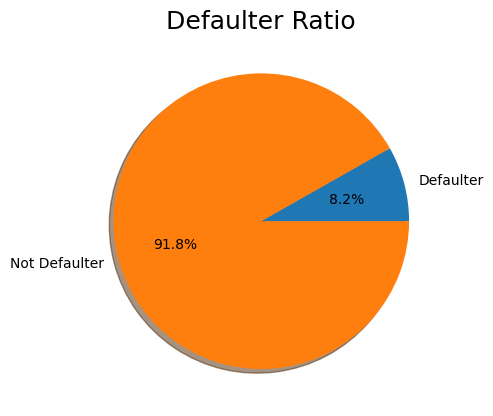

In [312]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

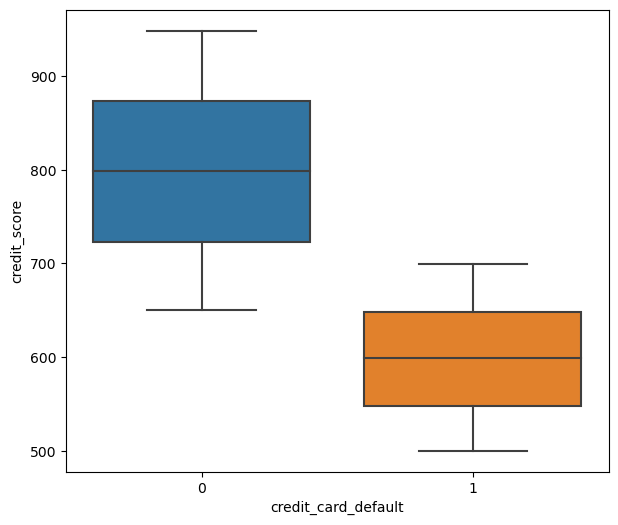

In [313]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(x='credit_card_default', y='credit_score', data=df)
# Using named parameters: x for the categories, y for the values to plot, and data for the dataframe
plt.show()

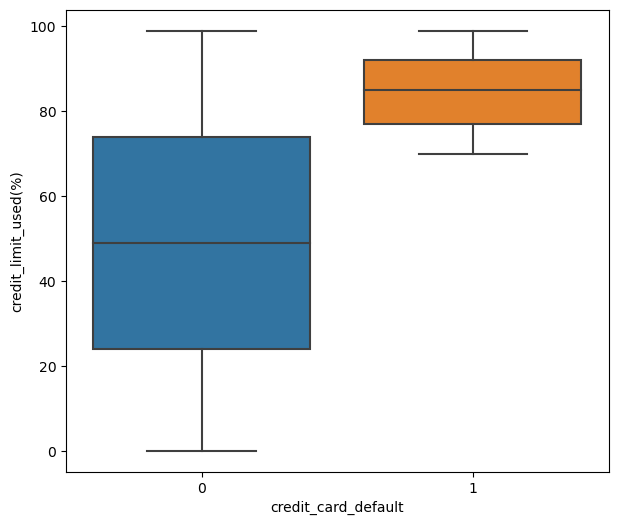

In [314]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)
# Using named parameters: x for the categories, y for the values to plot, and data for the dataframe
plt.show()

In [315]:
print(df['credit_card_default'])

34126    0
44609    0
44264    1
33556    0
28050    0
        ..
37523    0
36228    0
32772    0
9762     0
33325    0
Name: credit_card_default, Length: 30000, dtype: int64


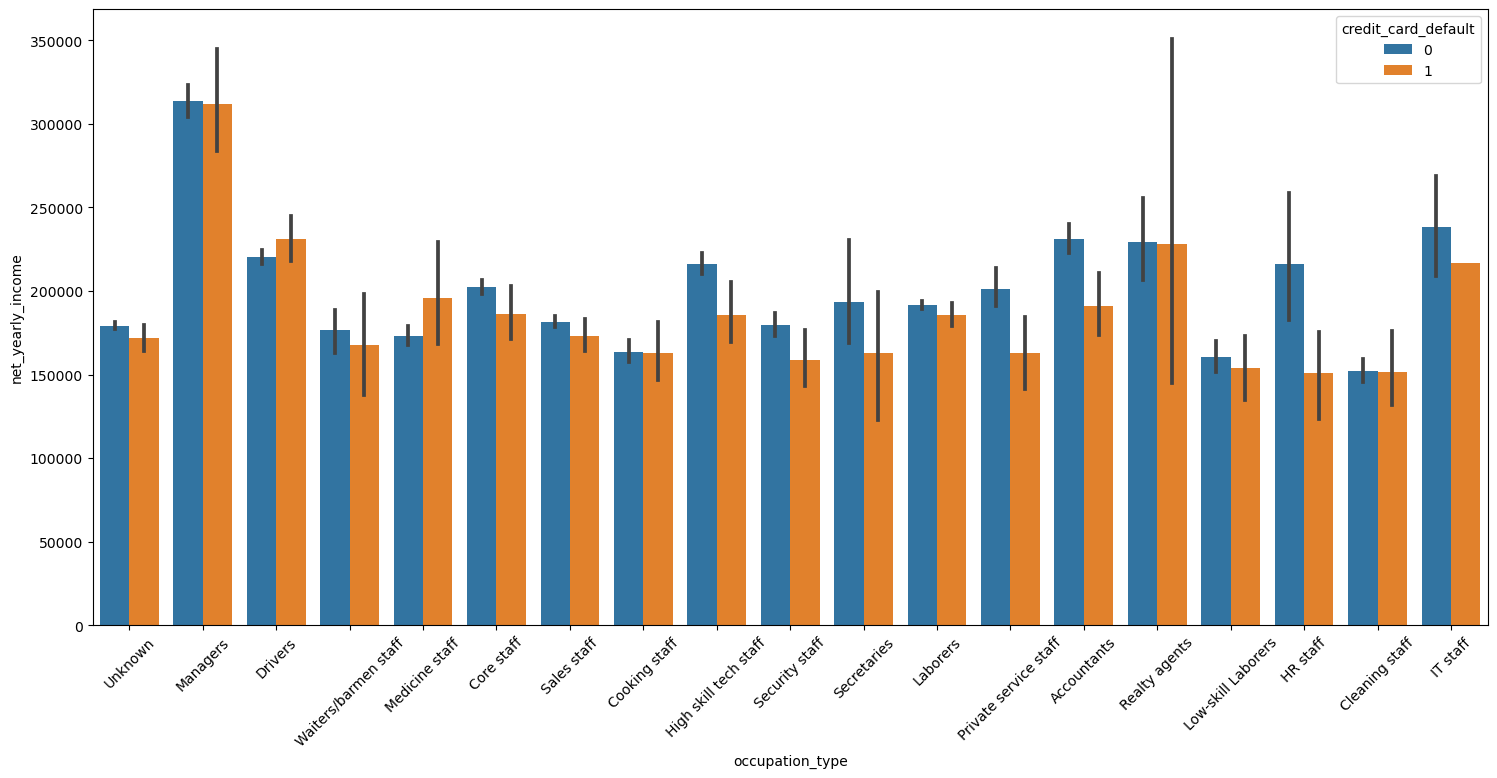

In [316]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

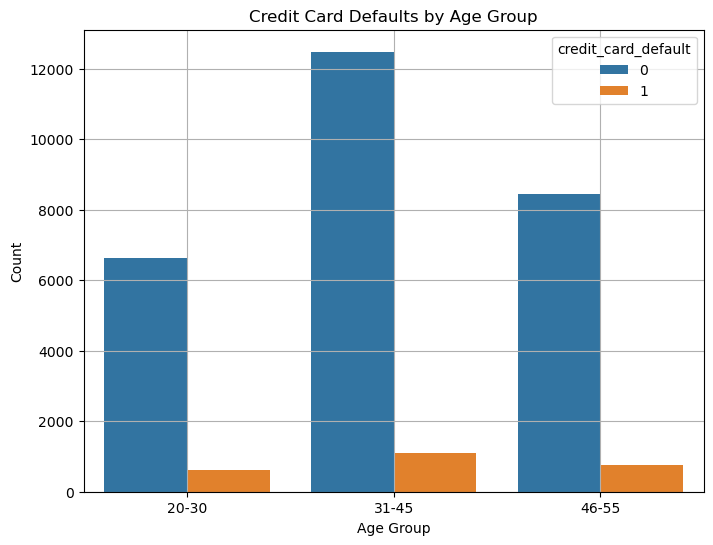

In [317]:
df['age_group'] = pd.cut(df['age'],
                         bins=[19, 30, 45, 55],
                         labels=['20-30', '31-45', '46-55'])

# Step 2: Plot using age_group instead of raw age
plt.figure(figsize=(8,6))
sns.countplot(x='age_group', hue='credit_card_default', data=df)
plt.title('Credit Card Defaults by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [318]:
# Normalize the credit_limit_used(%) column and rename it
df['credit_utilization'] = df['credit_limit_used(%)'] / 100

# Optionally drop the original column if you no longer need it
df.drop(columns=['credit_limit_used(%)'], inplace=True)

# Check the updated dataframe
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_score,prev_defaults,default_in_last_6months,credit_card_default,age_group,credit_utilization
34126,CST_163708,Wachtel,50,0,0,1,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,807.0,0,0,0,46-55,0.23
44609,CST_131305,Deepa,29,0,0,1,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,858.0,0,0,0,20-30,0.60
44264,CST_131350,Jason,39,0,0,1,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,667.0,0,0,1,31-45,0.81
33556,CST_106655,Gilbert Kreijger,35,0,1,1,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,690.0,0,0,0,31-45,0.32
28050,CST_154013,Slater,53,1,1,1,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,721.0,0,0,0,46-55,0.65


In [319]:
# Avoid division by zero or NaN
df['debt_to_income_ratio'] = df['yearly_debt_payments'] / df['net_yearly_income']

# Replace infinite or NaN values if any (e.g., due to zero income)
df['debt_to_income_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['debt_to_income_ratio'].fillna(0, inplace=True)

df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_score,prev_defaults,default_in_last_6months,credit_card_default,age_group,credit_utilization,debt_to_income_ratio
34126,CST_163708,Wachtel,50,0,0,1,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,807.0,0,0,0,46-55,0.23,0.064714
44609,CST_131305,Deepa,29,0,0,1,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,858.0,0,0,0,20-30,0.60,0.250116
44264,CST_131350,Jason,39,0,0,1,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,667.0,0,0,1,31-45,0.81,0.242021
33556,CST_106655,Gilbert Kreijger,35,0,1,1,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,690.0,0,0,0,31-45,0.32,0.222049
28050,CST_154013,Slater,53,1,1,1,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,721.0,0,0,0,46-55,0.65,0.254945


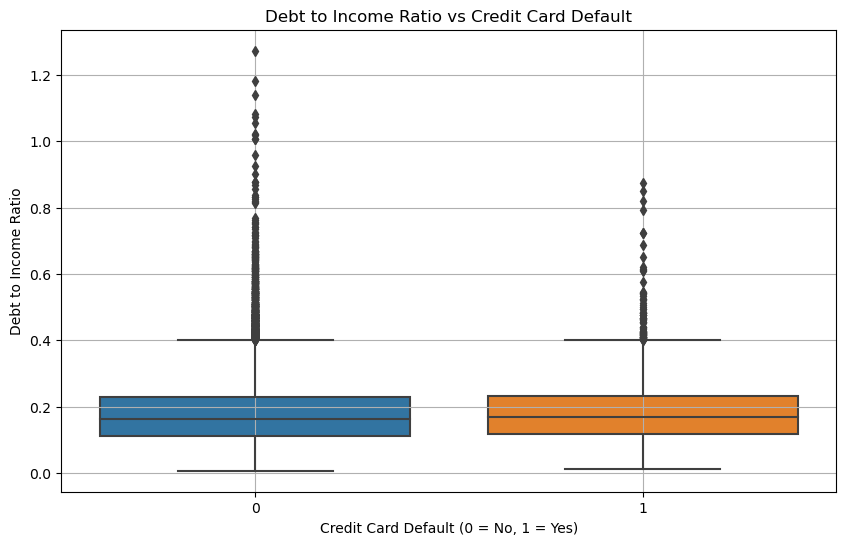

In [320]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_card_default', y='debt_to_income_ratio', data=df)
plt.title('Debt to Income Ratio vs Credit Card Default')
plt.xlabel('Credit Card Default (0 = No, 1 = Yes)')
plt.ylabel('Debt to Income Ratio')
plt.grid(True)
plt.show()

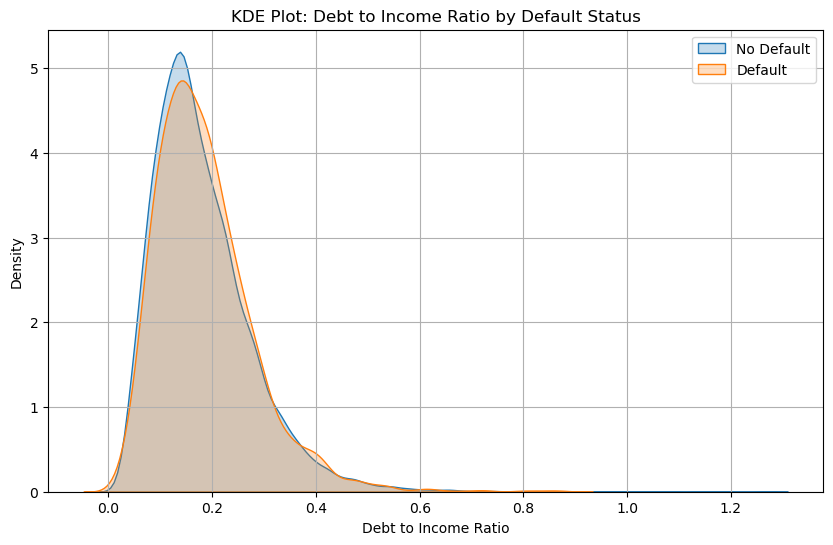

In [321]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['credit_card_default'] == 0]['debt_to_income_ratio'], label='No Default', shade=True)
sns.kdeplot(data=df[df['credit_card_default'] == 1]['debt_to_income_ratio'], label='Default', shade=True)
plt.title('KDE Plot: Debt to Income Ratio by Default Status')
plt.xlabel('Debt to Income Ratio')
plt.legend()
plt.grid(True)
plt.show()

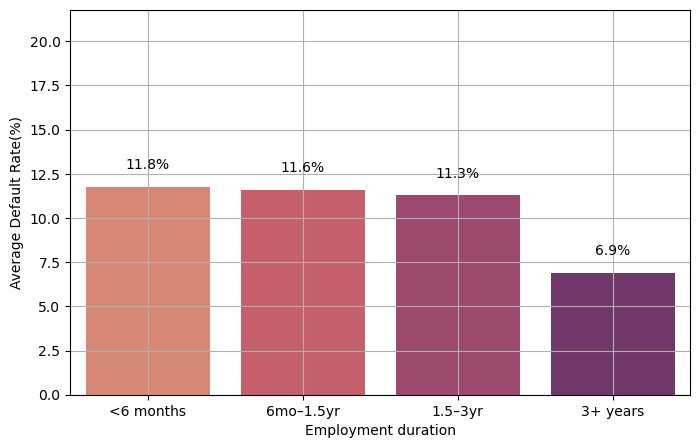

In [322]:
# Ensure employment_status column is defined
df['employment_status'] = pd.cut(df['no_of_days_employed'],
                                  bins=[-1, 180, 547, 1095, float('inf')],
                                  labels=['<6 months', '6mo–1.5yr', '1.5–3yr', '3+ years'])

emp_rate = df.groupby('employment_status')['credit_card_default'].mean().reset_index() 
emp_rate['credit_card_default'] = emp_rate['credit_card_default'] * 100 

plt.figure(figsize=(8,5))
sns.barplot(x='employment_status', y='credit_card_default', data=emp_rate, palette='flare')
plt.ylabel('Average Default Rate(%)')
plt.xlabel('Employment duration')
plt.grid(True)
for index, row in emp_rate.iterrows():
    plt.text(index, row['credit_card_default'] + 1, f"{row['credit_card_default']:.1f}%", ha='center')

plt.ylim(0, max(emp_rate['credit_card_default']) + 10)  # Padding above the tallest bar

plt.show()


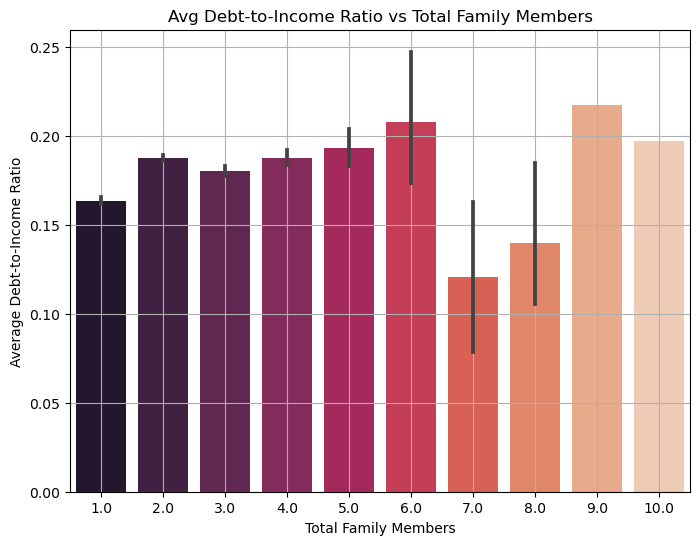

In [323]:
plt.figure(figsize=(8,6))
sns.barplot(x='total_family_members', y='debt_to_income_ratio', data=df, estimator=np.mean, palette='rocket')
plt.title('Avg Debt-to-Income Ratio vs Total Family Members')
plt.ylabel('Average Debt-to-Income Ratio')
plt.xlabel('Total Family Members')
plt.grid(True)
plt.show()


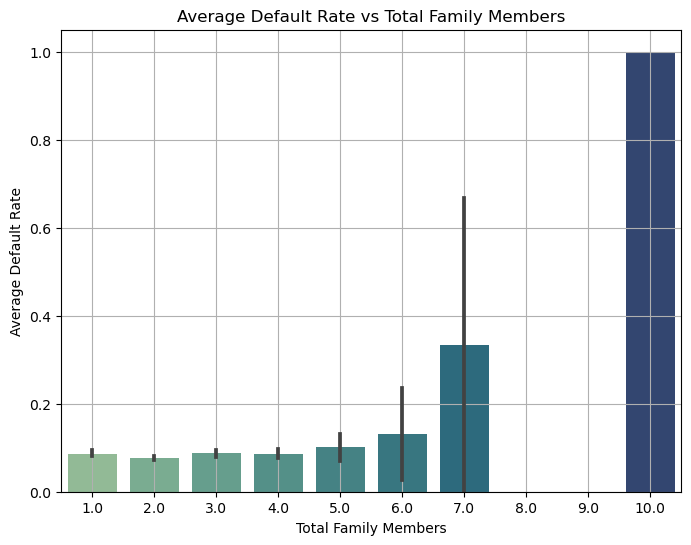

In [324]:
plt.figure(figsize=(8,6))
sns.barplot(x='total_family_members', y='credit_card_default', data=df, estimator=np.mean, palette='crest')
plt.title('Average Default Rate vs Total Family Members')
plt.ylabel('Average Default Rate')
plt.xlabel('Total Family Members')
plt.grid(True)
plt.show()

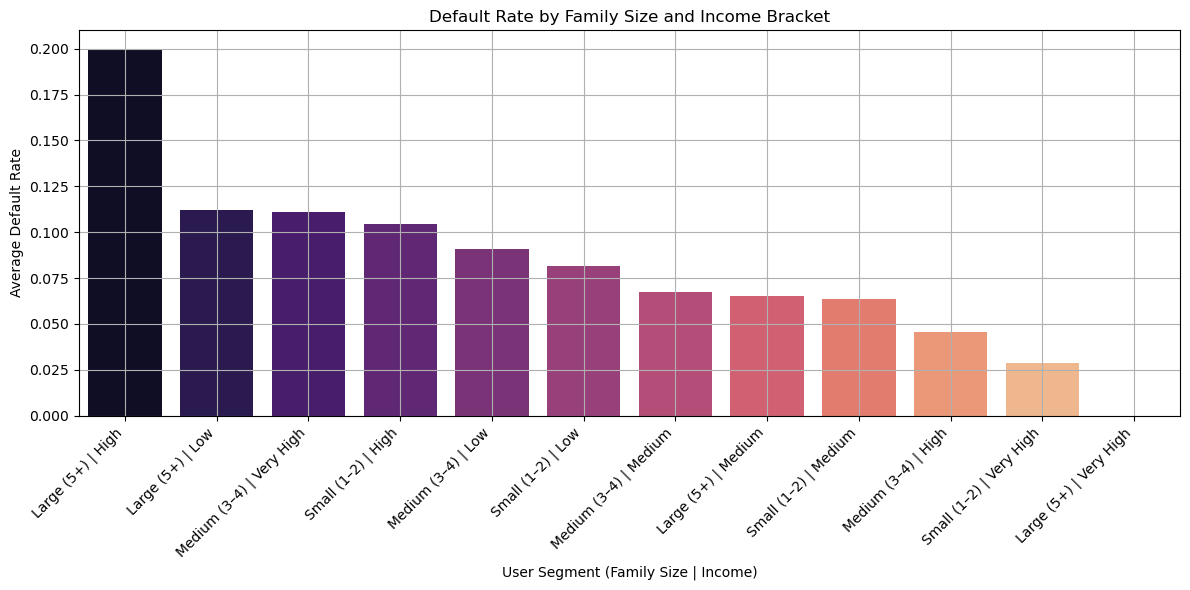

In [325]:
df['income_bracket'] = pd.cut(df['net_yearly_income'],
                              bins=[-1, 300000, 600000, 1000000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Very High'])
df['family_size_category'] = pd.cut(df['total_family_members'],
                                    bins=[0, 2, 4, float('inf')],
                                    labels=['Small (1–2)', 'Medium (3–4)', 'Large (5+)'])
df['segment'] = df['family_size_category'].astype(str) + ' | ' + df['income_bracket'].astype(str)
segment_analysis = df.groupby('segment')['credit_card_default'].mean().reset_index()
segment_analysis = segment_analysis.sort_values(by='credit_card_default', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='segment', y='credit_card_default', data=segment_analysis, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Default Rate by Family Size and Income Bracket')
plt.ylabel('Average Default Rate')
plt.xlabel('User Segment (Family Size | Income)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Do large families with low income default more?

# Are high-income small families more reliable?

# Is there a "sweet spot" where default rate is lowest?


In [326]:
df['owns_property'] = df['owns_car'].map({'Y': 1, 'N': 0}) + df['owns_house'].map({'Y': 1, 'N': 0})
plt.figure(figsize=(6,4))
sns.countplot(x='owns_property', data=df, palette='coolwarm')
plt.title('Distribution of Asset Ownership Scores')
plt.xlabel('Owns Property (0=none, 2=both)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 600x400 with 0 Axes>

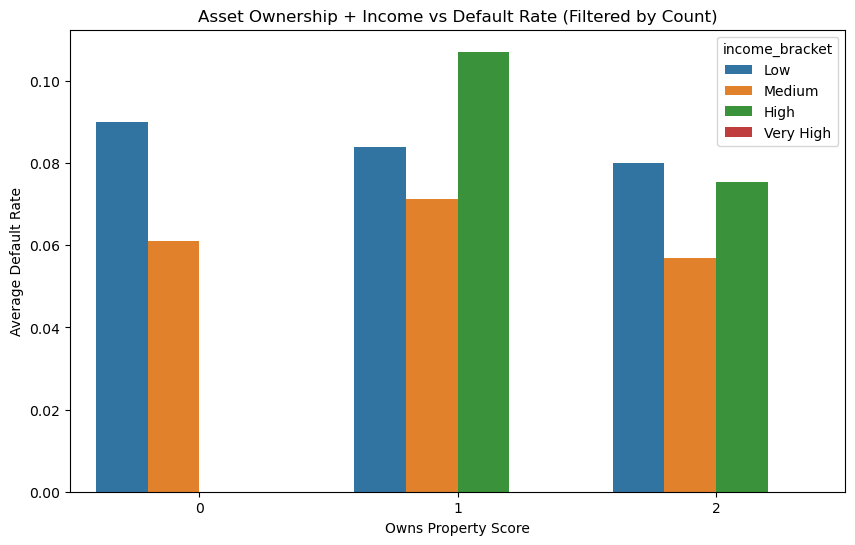

In [329]:
df['owns_property'] = df['owns_car']+ df['owns_house']
grouped = df.groupby(['owns_property', 'income_bracket']).agg(
    avg_default=('credit_card_default', 'mean'),
    count=('credit_card_default', 'count')
).reset_index()

# Filter out groups with fewer than X samples
grouped = grouped[grouped['count'] > 30]  # adjust this threshold

# Plot again
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='owns_property', y='avg_default', hue='income_bracket')
plt.title("Asset Ownership + Income vs Default Rate (Filtered by Count)")
plt.xlabel("Owns Property Score")
plt.ylabel("Average Default Rate")
plt.show()



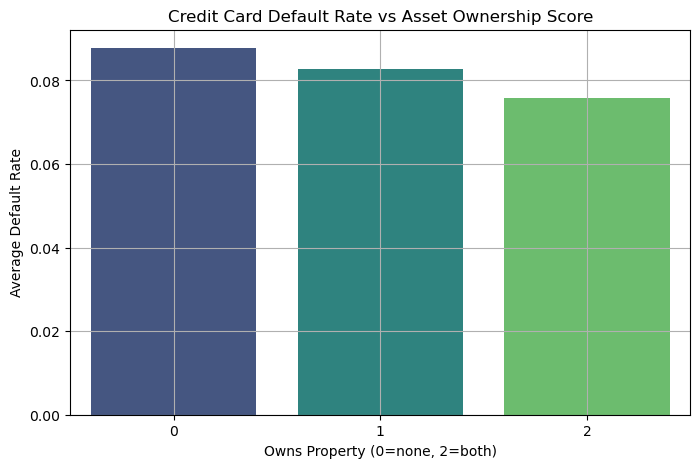

In [330]:
df['owns_property'] = df['owns_car'] + df['owns_house']
asset_default_rate = df.groupby('owns_property')['credit_card_default'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='owns_property', y='credit_card_default', data=asset_default_rate, palette='viridis')
plt.xlabel('Owns Property (0=none, 2=both)')
plt.ylabel('Average Default Rate')
plt.title('Credit Card Default Rate vs Asset Ownership Score')
plt.grid(True)
plt.show()

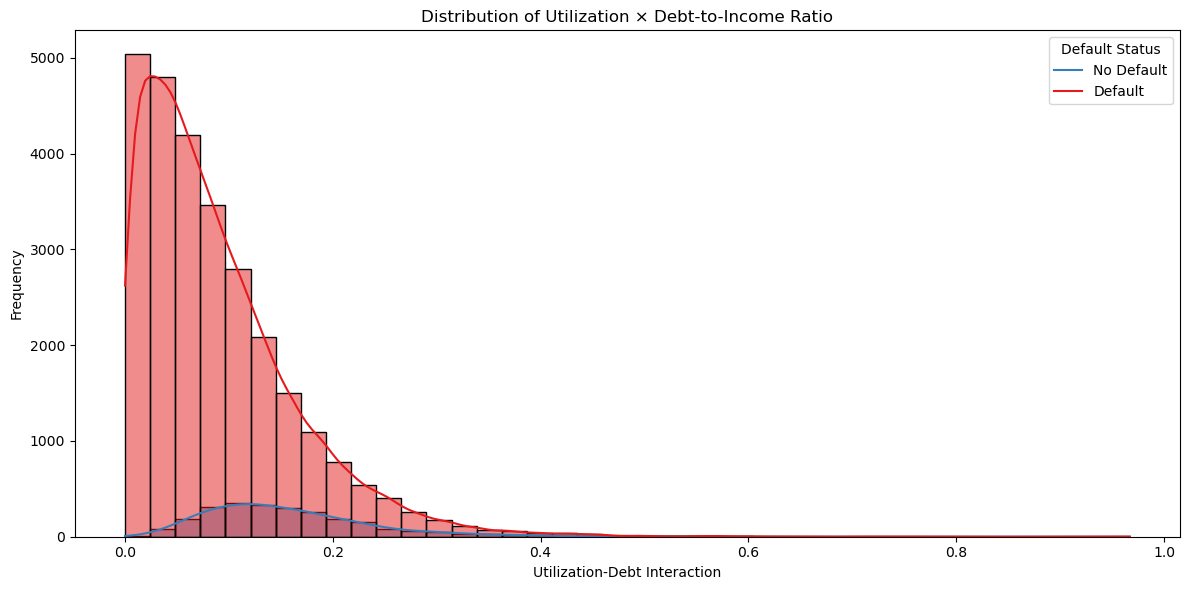

In [331]:
df['utilization_debt_interaction'] = (
    df['credit_utilization'] * df['debt_to_income_ratio']
)
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='utilization_debt_interaction', hue='credit_card_default', kde=True, bins=40, palette='Set1')
plt.title('Distribution of Utilization × Debt-to-Income Ratio')
plt.xlabel('Utilization-Debt Interaction')
plt.ylabel('Frequency')
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

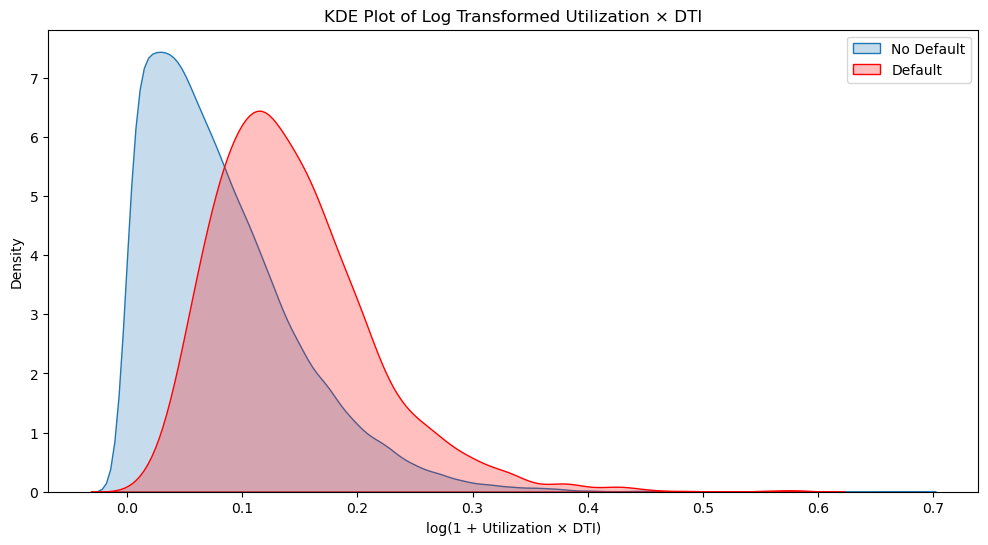

In [332]:
import numpy as np

df['log_utilization_dti'] = np.log1p(df['utilization_debt_interaction'])  # log(1 + x) to avoid log(0)

# Then plot KDE again
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['credit_card_default'] == 0], x='log_utilization_dti', label='No Default', shade=True)
sns.kdeplot(data=df[df['credit_card_default'] == 1], x='log_utilization_dti', label='Default', shade=True, color='red')
plt.title('KDE Plot of Log Transformed Utilization × DTI')
plt.xlabel('log(1 + Utilization × DTI)')
plt.ylabel('Density')
plt.legend()
plt.show()


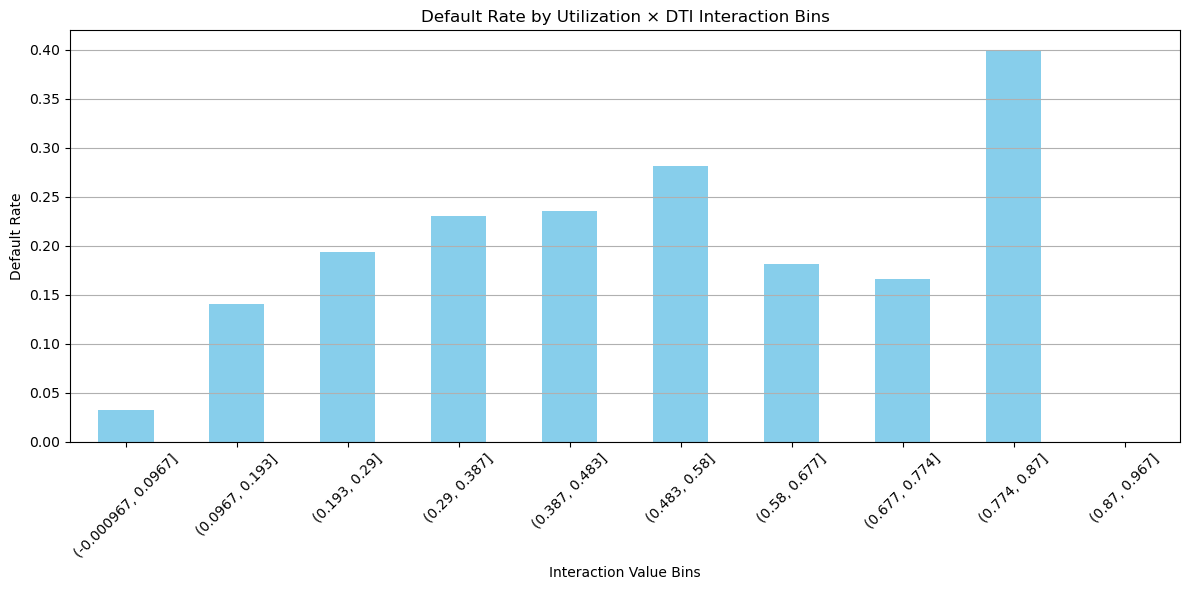

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin the interaction values
df['interaction_bin'] = pd.cut(df['utilization_debt_interaction'], bins=10)

# Calculate default rate per bin
bin_default_rate = df.groupby('interaction_bin')['credit_card_default'].mean()

# Plot
bin_default_rate.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Default Rate by Utilization × DTI Interaction Bins')
plt.xlabel('Interaction Value Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [334]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --- Load data ---
train = pd.read_csv(r"C:\Users\Punit\OneDrive\Desktop\HSBC_hackathon\train.csv")
test = pd.read_csv(r"C:\Users\Punit\OneDrive\Desktop\HSBC_hackathon\test (1).csv")

# --- Drop ID column if exists ---
train = train.drop(columns=['ID'], errors='ignore')
test = test.drop(columns=['ID'], errors='ignore')

# --- Separate features and target ---
y = train['credit_card_default']
X = train.drop(columns=['credit_card_default'])

# --- Match test columns ---
test = test[X.columns]

# --- Identify column types ---
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

# --- Preprocessing for numeric and categorical features ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# --- Create final pipeline with classifier ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# --- Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Fit model ---
model.fit(X_train, y_train)

# --- Evaluate model ---
y_pred = model.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# --- Predict on test set ---
test_predictions = model.predict(test)

# --- Save predictions ---
submission = pd.DataFrame({'credit_card_default': test_predictions})
submission.to_csv('predictions_logistic.csv', index=False)
print("✅ Predictions saved to 'predictions_logistic.csv'")


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8335
           1       0.95      0.80      0.87       771

    accuracy                           0.98      9106
   macro avg       0.97      0.90      0.93      9106
weighted avg       0.98      0.98      0.98      9106

Confusion Matrix:
 [[8302   33]
 [ 152  619]]
✅ Predictions saved to 'predictions_logistic.csv'
